In [2335]:
from io import StringIO
from Bio import Phylo
from scipy.optimize import curve_fit
from Bio.Phylo.TreeConstruction import DistanceCalculator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, shutil

In [2333]:
a = pd.read_csv('../r6/ipn/al.tsv', sep = '\t')

In [5]:
#fix misplaced classification errors from origin
for i,r in a.drop_duplicates('on').iterrows():
    if pd.isna(r['phylum']):
        if (not pd.isna(r['class'])) | (not pd.isna(r['order'])) | (not pd.isna(r['family'])):
            print('p', r['genus'])
    if pd.isna(r['class']):
        if (not pd.isna(r['order'])) | (not pd.isna(r['family'])):
            print('c', r['genus'])
    if pd.isna(r['order']):
        if (not pd.isna(r['family'])):
            print('o', r['genus'])

c Phytophthora
c Giardia
p Nannochloropsis
c Phytophthora
c Phytophthora


In [45]:
a.loc[a['genus'] == 'Phytophthora', 'kingdom'] = 'Fungi'
a.loc[a['genus'] == 'Giardia', 'kingdom'] = 'Metazoa'
a.loc[a['genus'] == 'Nannochloropsis', 'kingdom'] = 'Viridiplantae'

In [46]:
a.loc[a['genus'] == 'Nannochloropsis', 'phylum'] = 'Chlorophyta'

In [39]:
a['phylum'].value_counts()

phylum
Ascomycota       272
Arthropoda       172
Streptophyta     140
Chordata         128
Basidiomycota     76
Nematoda          28
Apicomplexa       24
Euglenozoa        12
Cnidaria          12
Chlorophyta       12
Oomycota          12
Mollusca           8
Fornicata          4
Rhodophyta         4
Mucoromycota       4
Name: count, dtype: int64

In [34]:
a[a['kingdom'] == 'Viridiplantae'].to_csv('../r6/ipn/vi152.tsv', sep = '\t', index = 0)
a[a['kingdom'] == 'Fungi'].to_csv('../r6/ipn/fu364.tsv', sep = '\t', index = 0)
a[a['kingdom'] == 'Metazoa'].to_csv('../r6/ipn/me352.tsv', sep = '\t', index = 0)
a[a['phylum'] == 'Ascomycota'].to_csv('../r6/ipn/as272.tsv', sep = '\t', index = 0)
a[a['phylum'] == 'Arthropoda'].to_csv('../r6/ipn/ar172.tsv', sep = '\t', index = 0)
a[a['phylum'] == 'Chordata'].to_csv('../r6/ipn/ve128.tsv', sep = '\t', index = 0)
a[a['phylum'] == 'Basidiomycota'].to_csv('../r6/ipn/ba76.tsv', sep = '\t', index = 0)
a[a['phylum'] == 'Chlorophyta'].to_csv('../r6/ipn/ch12.tsv', sep = '\t', index = 0)

In [50]:
a[(a['class'] == 'Magnoliopsida') & ~(a['order'].isin(['Poales','Asparagales','Zingiberales','Alismatales','Arecales','Dioscoreales','Pandanales','Liliales','Commelinales']))].to_csv('../r6/ipn/eu104.tsv', sep = '\t', index = 0)
a[(a['class'] == 'Magnoliopsida') & ~(a['order'].isin(['Malpighiales','Brassicales','Lamiales','Fabales','Solanales','Rosales','Myrtales','Caryophyllales','Malvales','Asterales','Fagales','Ericales','Sapindales','Cucurbitales','Gentianales','Vitaceae','Ranunculales','Apiales','Proteales','Saxifragales','Boraginales','Cornales','Oxalidales','Dipsacales','Aquifoliales','Buxales','Garryales','Icacinales','Trochodendrales','Celastrales']))].to_csv('../r6/ipn/li40.tsv', sep = '\t', index = 0)

In [63]:
for i in pd.read_csv('../r6/ipn/vi152.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/viridiplantae_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/viridiplantae_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i)

In [64]:
for i in pd.read_csv('../r6/ipn/fu364.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/fungi_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/fungi_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [65]:
for i in pd.read_csv('../r6/ipn/me352.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/metazoa_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/metazoa_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [66]:
for i in pd.read_csv('../r6/ipn/li40.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/liliopsida_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/liliopsida_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [67]:
for i in pd.read_csv('../r6/ipn/eu104.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/eudicots_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/eudicots_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [69]:
for i in pd.read_csv('../r6/ipn/as272.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/ascomycota_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/ascomycota_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [70]:
for i in pd.read_csv('../r6/ipn/ba76.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/basidiomycota_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/basidiomycota_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [71]:
for i in pd.read_csv('../r6/ipn/ar172.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/arthropoda_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/arthropoda_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [72]:
for i in pd.read_csv('../r6/ipn/ve128.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/vertebrata_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/vertebrata_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [73]:
for i in pd.read_csv('../r6/ipn/ch12.tsv', sep = '\t')['currentAccession']:
    if not os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/chlorophyta_odb10/full_table.tsv'.format(i)):
        print(i)
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/chlorophyta_odb10/full_table.tsv', sep = '\t')['Status'].unique():
            print(i,i)

In [76]:
df = pd.DataFrame()
for i in os.listdir('/wing2/users/mdalam/ipne/'):

    for l in ['viridiplantae', 'liliopsida', 'eudicots', 'chlorophyta', 'fungi', 'ascomycota', 'basidiomycota', 'metazoa', 'arthropoda', 'vertebrata']:

        if os.path.isfile('/wing2/users/mdalam/ipne/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
    
            td = pd.read_csv('/wing2/users/mdalam/ipne/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
            td['Assembly'] = i
            td['l'] = l
            df = pd.concat([df,td], axis = 0)       
        # else:
        #     print("something wrong. {0} {1}".format(i,l))

In [84]:
set(df[df['l'] == 'eudicots']['Assembly'].unique()).difference(set(a[(a['class'] == 'Magnoliopsida') & ~(a['order'].isin(['Poales','Asparagales','Zingiberales','Alismatales','Arecales','Dioscoreales','Pandanales','Liliales','Commelinales']))]['currentAccession']))

{'GCA_021398055.1'}

In [117]:
eus = set(a[(a['class'] == 'Magnoliopsida') & ~a['order'].isin(['Poales','Asparagales','Zingiberales','Alismatales','Arecales','Dioscoreales','Pandanales','Liliales','Commelinales'])]['currentAccession'])
fus = set(a[a['kingdom'] == 'Fungi']['currentAccession'])
lis = set(a[(a['class'] == 'Magnoliopsida') & ~(a['order'].isin(['Malpighiales','Brassicales','Lamiales','Fabales','Solanales','Rosales','Myrtales','Caryophyllales','Malvales','Asterales','Fagales','Ericales','Sapindales','Cucurbitales','Gentianales','Vitaceae','Ranunculales','Apiales','Proteales','Saxifragales','Boraginales','Cornales','Oxalidales','Dipsacales','Aquifoliales','Buxales','Garryales','Icacinales','Trochodendrales','Celastrales']))]['currentAccession'])

In [126]:
df = df[~((df['l'] == 'eudicots') & (~(df['Assembly'].isin(eus))))]
df = df[~((df['l'] == 'fungi') & (~(df['Assembly'].isin(fus))))]
df = df[~((df['l'] == 'liliopsida') & (~(df['Assembly'].isin(lis))))]

In [129]:
#df.to_csv('foursetsae.tsv', sep = '\t', index = 0)

In [ ]:
#pacbio, illumina, nanopore and refseq

In [161]:
pbs = set(a.iloc[0:227,:]['currentAccession'].unique())

In [160]:
nps = set(a.iloc[227:454,:]['currentAccession'].unique())

In [159]:
ils = set(a.iloc[454:681,:]['currentAccession'].unique())

In [158]:
rfs = set(a.iloc[681:909,:]['currentAccession'].unique())

In [165]:
df2 = df[(df['Status'] == 'Single') | (df['Status'] == 'Duplicated')]

In [179]:
df2[df2['Assembly'].isin(pbs)].groupby('Assembly')['Sequence'].nunique().mean()

48.815668202764975

In [180]:
df2[df2['Assembly'].isin(nps)].groupby('Assembly')['Sequence'].nunique().mean()

96.29493087557604

In [181]:
df2[df2['Assembly'].isin(ils)].groupby('Assembly')['Sequence'].nunique().mean()

326.0740740740741

In [182]:
df2[df2['Assembly'].isin(rfs)].groupby('Assembly')['Sequence'].nunique().mean()

76.3778801843318

In [185]:
df2['fl'] = df2.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
df2['fr'] = df2.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)

/tmp/ipykernel_1085695/8131931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fl'] = df2.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
/tmp/ipykernel_1085695/8131931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fr'] = df2.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)


In [187]:
df2 = df2.sort_values(['l', 'Assembly', 'Sequence', 'fl'])

In [189]:
df2 = df2.sort_values(['l', 'Assembly', 'Sequence', 'fl'])
df2['g-1'] = df2['Gene'].shift(-1)
df2['fl-1'] = df2['fl'].shift(-1)
df2['fso'] = df2['fl-1'] - df2['fr']
df2['s-1'] = df2['Sequence'].shift(-1)

In [465]:
#df3 = df2[~((df2['Sequence'] == df2['s-1']) & (df2['fso'] < 0 ))]
df3 = df2[~((df2['Sequence'] == df2['s-1']) & (df2['Gene'] == df2['g-1']) & (df2['fso'] < 0 ))]
df3['las'] = df3['l'] + '_' + df3['Assembly'] + '_' + df3['Sequence']

In [467]:
d4 = df3[~df3['las'].isin(df3.groupby('las')['Gene'].count()[df3.groupby('las')['Gene'].count() == 1].index)]

In [ ]:
e1 = d4[d4['Assembly'].isin(pbs)]
e2 = d4[d4['Assembly'].isin(nps)]
e3 = d4[d4['Assembly'].isin(ils)]
e4 = d4[d4['Assembly'].isin(rfs)]

In [23]:
def syndis(ref, que):
    n1 = ref['Sequence'].nunique()
    n2 = que['Sequence'].nunique()

    mx = max(n1,n2) - min(n1,n2)

    ref = ref.sort_values(['Sequence', 'fl'])
    que = que.sort_values(['Sequence', 'fl'])
    
    ref = ref.reset_index(drop = 1)
    que = que.reset_index(drop = 1)

    ref['g-1'] = ref['Gene'].shift(-1)
    que['g-1'] = que['Gene'].shift(-1)
    ref['o-1'] = ref['Strand'].shift(-1)
    que['o-1'] = que['Strand'].shift(-1)
    ref['s-1'] = ref['Sequence'].shift(-1)
    que['s-1'] = que['Sequence'].shift(-1)

    ref = ref[ref['s-1'] == ref['Sequence']]
    que = que[que['s-1'] == que['Sequence']]

    ref['gb'] = ref.apply(lambda c: str(sorted([c['Gene'], c['g-1']])) + ('f' if c['Strand'] == c['o-1'] else 'r'), axis = 1)
    que['gb'] = que.apply(lambda c: str(sorted([c['Gene'], c['g-1']])) + ('f' if c['Strand'] == c['o-1'] else 'r'), axis = 1)

    ref.loc[ref['gb'].duplicated(keep=False), 'gb'] += ref.groupby('gb').cumcount().add(1).astype(str)
    que.loc[que['gb'].duplicated(keep=False), 'gb'] += que.groupby('gb').cumcount().add(1).astype(str)

    n = len(set(ref['gb']).intersection(set(que['gb']))) / (len(set(ref['gb']).union(set(que['gb']))) - mx)
    
    return n

In [429]:
e1.groupby('Assembly')['Gene'].nunique().mean()

2541.8156682027648

In [430]:
e2.groupby('Assembly')['Gene'].nunique().mean()

2515.304147465438

In [369]:
e3.groupby('Assembly')['Gene'].nunique().mean()

2427.259259259259

In [ ]:
#redo

In [6]:
a = pd.read_csv('../r6/ipn3/kl', sep = '\t')

In [7]:
b = pd.concat([pd.DataFrame(a[[x for x in a.columns if x[-2:]=='_x']].values),pd.DataFrame(a[[x for x in a.columns if x[-2:]=='_y']].values)])
b.columns = [x for x in a.columns if x[-2:]=='_x']

In [8]:
l1 = [x for x in a.columns if x[-2:]=='_x']

In [9]:
c1 = pd.read_csv('../r6/ipn3/ar', header = None)
c2 = pd.read_csv('../r6/ipn3/as', header = None)
c3 = pd.read_csv('../r6/ipn3/ba', header = None)
c4 = pd.read_csv('../r6/ipn3/eu', header = None)
c5 = pd.read_csv('../r6/ipn3/li', header = None)
c6 = pd.read_csv('../r6/ipn3/ve', header = None)

In [643]:
for i in pd.read_csv('../r6/ipn3/ar', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/arthropoda_odb10/full_table.tsv'.format(i)):
        print(i)        
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/arthropoda_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

for i in pd.read_csv('../r6/ipn3/as', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/ascomycota_odb10/full_table.tsv'.format(i)):
        print(i)
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/ascomycota_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

for i in pd.read_csv('../r6/ipn3/ba', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/basidiomycota_odb10/full_table.tsv'.format(i)):
        print(i)
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/basidiomycota_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

for i in pd.read_csv('../r6/ipn3/eu', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/eudicots_odb10/full_table.tsv'.format(i)):
        print(i)
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/eudicots_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

for i in pd.read_csv('../r6/ipn3/li', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/liliopsida_odb10/full_table.tsv'.format(i)):
        print(i)
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/liliopsida_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

for i in pd.read_csv('../r6/ipn3/ve', header = None, sep = '\t')[0]:
    if not os.path.isfile('/wing2/users/mdalam/ipn3/{0}/{0}.mb/vertebrata_odb10/full_table.tsv'.format(i)):
        print(i)
    else:
        if 'Single' not in pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/vertebrata_odb10/full_table.tsv'.format(i), sep = '\t')['Status'].unique():
            print(i)

GCA_952773055.1
GCA_014529535.2
GCA_943181505.1
GCA_963576625.1
GCA_900634625.2
GCA_900634775.2
GCA_963422515.1


In [11]:
t = ['GCA_952773055.1', 'GCA_014529535.2', 'GCA_943181505.1', 'GCA_963576625.1','GCA_900634625.2','GCA_900634775.2','GCA_963422515.1']

In [12]:
df = pd.DataFrame()
for i in pd.read_csv('../r6/ipn3/ar', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'arthropoda'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)  
for i in pd.read_csv('../r6/ipn3/as', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'ascomycota'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)  
for i in pd.read_csv('../r6/ipn3/ba', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'basidiomycota'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)  
for i in pd.read_csv('../r6/ipn3/eu', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'eudicots'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)  
for i in pd.read_csv('../r6/ipn3/li', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'liliopsida'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)
for i in pd.read_csv('../r6/ipn3/ve', header = None, sep = '\t')[0]:
    if i not in t:
        l = 'vertebrata'
        td = pd.read_csv('/wing2/users/mdalam/ipn3/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        df = pd.concat([df,td], axis = 0)

In [13]:
df2 = df[(df['Status'] == 'Single') | (df['Status'] == 'Duplicated')]

In [15]:
df2[df2['Assembly'].isin(a['currentAccession_x'])].groupby('Assembly')['Sequence'].nunique().mean()

37.259349593495934

In [16]:
df2[df2['Assembly'].isin(a['currentAccession_y'])].groupby('Assembly')['Sequence'].nunique().mean()

438.2449310624493

In [17]:
df2['fl'] = df2.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
df2['fr'] = df2.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)

/tmp/ipykernel_2017200/8131931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fl'] = df2.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
/tmp/ipykernel_2017200/8131931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fr'] = df2.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)


In [18]:
df2 = df2.sort_values(['l', 'Assembly', 'Sequence', 'fl'])
df2['g-1'] = df2['Gene'].shift(-1)
df2['fl-1'] = df2['fl'].shift(-1)
df2['fso'] = df2['fl-1'] - df2['fr']
df2['s-1'] = df2['Sequence'].shift(-1)

In [19]:
df3 = df2[~((df2['Sequence'] == df2['s-1']) & (df2['Gene'] == df2['g-1']) & (df2['fso'] < 0 ))]
df3['las'] = df3['l'] + '_' + df3['Assembly'] + '_' + df3['Sequence']

/tmp/ipykernel_2017200/2359433411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['las'] = df3['l'] + '_' + df3['Assembly'] + '_' + df3['Sequence']


In [20]:
d4 = df3[~df3['las'].isin(df3.groupby('las')['Gene'].count()[df3.groupby('las')['Gene'].count() == 1].index)]

In [24]:
t = []
for e,f in a[['currentAccession_x','currentAccession_y']].values:
    if d4[d4['Assembly'] == e].shape[0] != 0 and d4[d4['Assembly'] == f].shape[0] != 0:
        t.append([e,f, syndis(d4[d4['Assembly'] == e], d4[d4['Assembly'] == f])])

In [25]:
t2 = []
for e,f in pd.DataFrame(t)[[0,1]].values:
    t2.append([e,f,
               df2[df2['Assembly'] == e]['Gene'].nunique() / df2[df2['l'] == df2[df2['Assembly'] == e]['l'].iloc[0]]['Gene'].nunique(),
              df2[df2['Assembly'] == f]['Gene'].nunique() / df2[df2['l'] == df2[df2['Assembly'] == f]['l'].iloc[0]]['Gene'].nunique()])

In [26]:
t3 = pd.DataFrame(t2)

In [27]:
t3[4] = t3[2] - t3[3]

In [28]:
t4 = t3[(t3[3] > 0.8) & (t3[2] > 0.8)]

In [29]:
t5 = pd.DataFrame(t)

In [30]:
t5[5] = 'Syndis'

In [31]:
t5[4] = 1- t5[2]

In [32]:
t6 = t4[t4[4] > 0]

In [33]:
t6[5] = 'BUSCOdis'

/tmp/ipykernel_2017200/2861549522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t6[5] = 'BUSCOdis'


In [56]:
t7fixed = pd.concat([t5[t5[0].isin(t6[0])],t6],axis = 0).reset_index() 

In [59]:
import seaborn as sns

<Axes: xlabel='5', ylabel='4'>

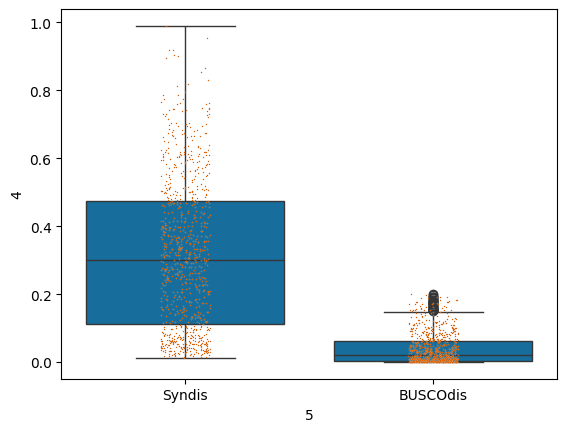

In [60]:
sns.boxplot(x=5, y=4, data=t7fixed, color = sns.color_palette("colorblind")[0])
sns.stripplot(x=5, y=4, data=t7fixed, s = 1, color=sns.color_palette("colorblind")[3], edgecolor="white", linewidth= 0.05)

In [ ]:
#distance matrix

In [ ]:
#orientation ignorant

In [791]:
g = pd.read_csv('../r6/UniPhy/tnc2', sep = '\t')

In [792]:
g = g.sort_values(['l', 'Assembly', 'Sequence', 'fl'])
g['o-1'] = g['Strand'].shift(-1)
g.loc[g['g-1'].notnull(), 'gd'] = g[g['g-1'].notnull()].apply(lambda c: str(sorted([c['Gene'], c['g-1']])), axis = 1)
g.loc[g['o-1'].notnull(), 'do'] = g[g['o-1'].notnull()].apply(lambda c: 's' if c['Strand'] == c['o-1'] else 'o', axis = 1)
g['seq2'] = g['Sequence'].apply(lambda x: x[:-5] if x[-5:] == '_null' else x)
g2 = g.sort_values(['l', 'Assembly', 'seq2', 'fl'])

In [793]:
g4 = g[(g['t'] == 't') & (g['gd'].notnull())]
g4['agd'] = g4['Assembly']+'_'+g4['gd']
g4.loc[g4['agd'].duplicated(keep=False), 'agd'] += g4.groupby('agd').cumcount().add(1).astype(str)
g4['agdar'] = g4['agd'].apply(lambda x: x.split('_')[-1])
j = g4.groupby(['l','Assembly'])['agdar'].agg(set).reset_index()

/tmp/ipykernel_1085695/1152948279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g4['agd'] = g4['Assembly']+'_'+g4['gd']
/tmp/ipykernel_1085695/1152948279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g4['agdar'] = g4['agd'].apply(lambda x: x.split('_')[-1])


In [794]:
j1 = j[j['l'] == 'viridiplantae']
j2 = j[j['l'] == 'liliopsida']
j3 = j[j['l'] == 'eudicots']
j4 = j[j['l'] == 'chlorophyta']
j5 = j[j['l'] == 'fungi']
j6 = j[j['l'] == 'ascomycota']
j7 = j[j['l'] == 'basidiomycota']
j8 = j[j['l'] == 'metazoa']
j9 = j[j['l'] == 'arthropoda']
j10= j[j['l'] == 'vertebrata']

In [795]:
def syndm(jn):
    t = []
    ij = 0
    for ia,ib,ic in jn.values:
        t2 = []
        ij2 = 0
        for ie,ig,ih in jn.values:
            if ij2 < ij:
                t2.append(0)
                ij2+=1
                continue
    
            t2.append((len(ic.intersection(ih)) * 10000)/ len(ic.union(ih)))
            
            ij2+=1
        t.append([ib] + t2)
        ij+=1
    return t

In [796]:
k1 = pd.DataFrame(syndm(j2))

In [ ]:
#orientation aware

In [806]:
g4['agdo'] = g4['agd']+g4['do']

/tmp/ipykernel_1085695/715174931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g4['agdo'] = g4['agd']+g4['do']


In [807]:
g4.loc[g4['agdo'].duplicated(keep=False), 'agdo'] += g4.groupby('agdo').cumcount().add(1).astype(str)
g4['agdoar'] = g4['agdo'].apply(lambda x: x.split('_')[-1])
j = g4.groupby(['l','Assembly'])['agdoar'].agg(set).reset_index()

/tmp/ipykernel_1085695/2152012246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g4['agdoar'] = g4['agdo'].apply(lambda x: x.split('_')[-1])


In [808]:
j1 = j[j['l'] == 'viridiplantae']
j2 = j[j['l'] == 'liliopsida']
j3 = j[j['l'] == 'eudicots']
j4 = j[j['l'] == 'chlorophyta']
j5 = j[j['l'] == 'fungi']
j6 = j[j['l'] == 'ascomycota']
j7 = j[j['l'] == 'basidiomycota']
j8 = j[j['l'] == 'metazoa']
j9 = j[j['l'] == 'arthropoda']
j10= j[j['l'] == 'vertebrata']

In [873]:
m1 = pd.read_csv('../r7/viridiplantae/m1a.tsv', sep = '\t')
m2 = pd.read_csv('../r7/liliopsida/m5a.tsv', sep = '\t')
m3 = pd.read_csv('../r7/eudicots/m4a.tsv', sep = '\t')
m4 = pd.read_csv('../r7/chlorophyta/m2a.tsv', sep = '\t')
m5 = pd.read_csv('../r7/fungi/m1b.tsv', sep = '\t')
m6 = pd.read_csv('../r7/ascomycota/m2b.tsv', sep = '\t')
m7 = pd.read_csv('../r7/basidiomycota/m3b.tsv', sep = '\t')
m8 = pd.read_csv('../r7/metazoa/m1c.tsv', sep = '\t')
m9 = pd.read_csv('../r7/arthropoda/m2c.tsv', sep = '\t')
m10= pd.read_csv('../r7/vertebrata/m3c.tsv', sep = '\t')

In [890]:
n1 = m1[(m1['NumLev'] < 3) & (m1['on'].isin(bn.leaves(vit1)))]
n2 = m2[(m2['NumLev'] < 3) & (m2['on'].isin(bn.leaves(lit1)))]
n3 = m3[(m3['NumLev'] < 3) & (m3['on'].isin(bn.leaves(eut1)))]
n4 = m4[(m4['NumLev'] < 3) & (m4['on'].isin(bn.leaves(cht1)))]
n5 = m5[(m5['NumLev'] < 3) & (m5['on'].isin(bn.leaves(fut1)))]
n6 = m6[(m6['NumLev'] < 3) & (m6['on'].isin(bn.leaves(ast1)))]
n7 = m7[(m7['NumLev'] < 3) & (m7['on'].isin(bn.leaves(bat1)))]
n8 = m8[(m8['NumLev'] < 3) & (m8['on'].isin(bn.leaves(met1)))]
n9 = m9[(m9['NumLev'] < 3) & (m9['on'].isin(bn.leaves(art1)))]
n10= m10[(m10['NumLev'] < 3) & (m10['on'].isin(bn.leaves(vet1)))]

In [ ]:
#branch-length distance matrix

In [815]:
with open('../r6/amt/artop40k.t1') as f:
    art1 = f.readline()[:-1]
with open('../r6/amt/astop40k.t1') as f:
    ast1 = f.readline()[:-1]
with open('../r6/amt/batop40k.t1') as f:
    bat1 = f.readline()[:-1]
with open('../r6/amt/chtop40k.t1') as f:
    cht1 = f.readline()[:-1]
with open('../r6/amt/eutop40k.t1') as f:
    eut1 = f.readline()[:-1]
with open('../r6/amt/futop40k.t1') as f:
    fut1 = f.readline()[:-1]
with open('../r6/amt/litop40k.t1') as f:
    lit1 = f.readline()[:-1]
with open('../r6/amt/metop20k.t1') as f:
    met1 = f.readline()[:-1]
with open('../r6/amt/vetop40k.t1') as f:
    vet1 = f.readline()[:-1]
with open('../r6/amt/vitop40k.t1') as f:
    vit1 = f.readline()[:-1]

In [891]:
k1 = j1[j1['Assembly'].isin(n1['Assembly'])]
k2 = j2[j2['Assembly'].isin(n2['Assembly'])]
k3 = j3[j3['Assembly'].isin(n3['Assembly'])]
k4 = j4[j4['Assembly'].isin(n4['Assembly'])]
k5 = j5[j5['Assembly'].isin(n5['Assembly'])]
k6 = j6[j6['Assembly'].isin(n6['Assembly'])]
k7 = j7[j7['Assembly'].isin(n7['Assembly'])]
k8 = j8[j8['Assembly'].isin(n8['Assembly'])]
k9 = j9[j9['Assembly'].isin(n9['Assembly'])]
k10= j10[j10['Assembly'].isin(n10['Assembly'])]

In [892]:
l1 = pd.DataFrame(syndm(k1))
l2 = pd.DataFrame(syndm(k2))
l3 = pd.DataFrame(syndm(k3))
l4 = pd.DataFrame(syndm(k4))
l5 = pd.DataFrame(syndm(k5))
l6 = pd.DataFrame(syndm(k6))
l7 = pd.DataFrame(syndm(k7))
l8 = pd.DataFrame(syndm(k8))
l9 = pd.DataFrame(syndm(k9))
l10= pd.DataFrame(syndm(k10))

In [893]:
l1 = pd.merge(l1,n1[['on','Assembly']], left_on=0,right_on='Assembly')
l2 = pd.merge(l2,n2[['on','Assembly']], left_on=0,right_on='Assembly')
l3 = pd.merge(l3,n3[['on','Assembly']], left_on=0,right_on='Assembly')
l4 = pd.merge(l4,n4[['on','Assembly']], left_on=0,right_on='Assembly')
l5 = pd.merge(l5,n5[['on','Assembly']], left_on=0,right_on='Assembly')
l6 = pd.merge(l6,n6[['on','Assembly']], left_on=0,right_on='Assembly')
l7 = pd.merge(l7,n7[['on','Assembly']], left_on=0,right_on='Assembly')
l8 = pd.merge(l8,n8[['on','Assembly']], left_on=0,right_on='Assembly')
l9 = pd.merge(l9,n9[['on','Assembly']], left_on=0,right_on='Assembly')
l10= pd.merge(l10,n10[['on','Assembly']], left_on=0,right_on='Assembly')

In [905]:
p1 = Phylo.read(StringIO(vit1), "newick")
p2 = Phylo.read(StringIO(lit1), "newick")
p3 = Phylo.read(StringIO(eut1), "newick")
p4 = Phylo.read(StringIO(cht1), "newick")
p5 = Phylo.read(StringIO(fut1), "newick")
p6 = Phylo.read(StringIO(ast1), "newick")
p7 = Phylo.read(StringIO(bat1), "newick")
p8 = Phylo.read(StringIO(met1), "newick")
p9 = Phylo.read(StringIO(art1), "newick")
p10= Phylo.read(StringIO(vet1), "newick")

In [909]:
def lpd(li,pi):
    o1 = []
    ij = 0
    for i in li['on']:
        o2 = []
        ij2 = 0
        for i2 in li['on']:
            if ij2 < ij:
                o2.append(0)
                ij2+=1
                continue

            o2.append(pi.distance(i,i2))
        o1.append(o2)
        ij+=1
    return pd.DataFrame(o1)

In [ ]:
q1 = lpd(l1,p1)
q2 = lpd(l2,p2)
q3 = lpd(l3,p3)
q4 = lpd(l4,p4)
q5 = lpd(l5,p5)
q6 = lpd(l6,p6)
q7 = lpd(l7,p7)
q8 = lpd(l8,p8)
q9 = lpd(l9,p9)
q10= lpd(l10,p10)

In [1104]:
r1 = pd.concat([l1.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q1.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r2 = pd.concat([l2.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q2.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r3 = pd.concat([l3.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q3.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r4 = pd.concat([l4.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q4.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r5 = pd.concat([l5.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q5.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r6 = pd.concat([l6.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q6.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r7 = pd.concat([l7.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q7.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r8 = pd.concat([l8.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q8.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r9 = pd.concat([l9.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q9.melt()[['value']].rename(columns = {'value':2})], axis = 1)
r10= pd.concat([l10.iloc[:,1:-2].melt().rename(columns = {'value':1,'variable':0}), q10.melt()[['value']].rename(columns = {'value':2})], axis = 1)

/tmp/ipykernel_1085695/1930773201.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, xdata, ydata)
/tmp/ipykernel_1085695/1930773201.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100),
/tmp/ipykernel_1085695/1930773201.py:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, xdata, ydata)
/tmp/ipykernel_1085695/1930773201.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100),
/tmp/ipykernel_1085695/1930773201.py:56: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x

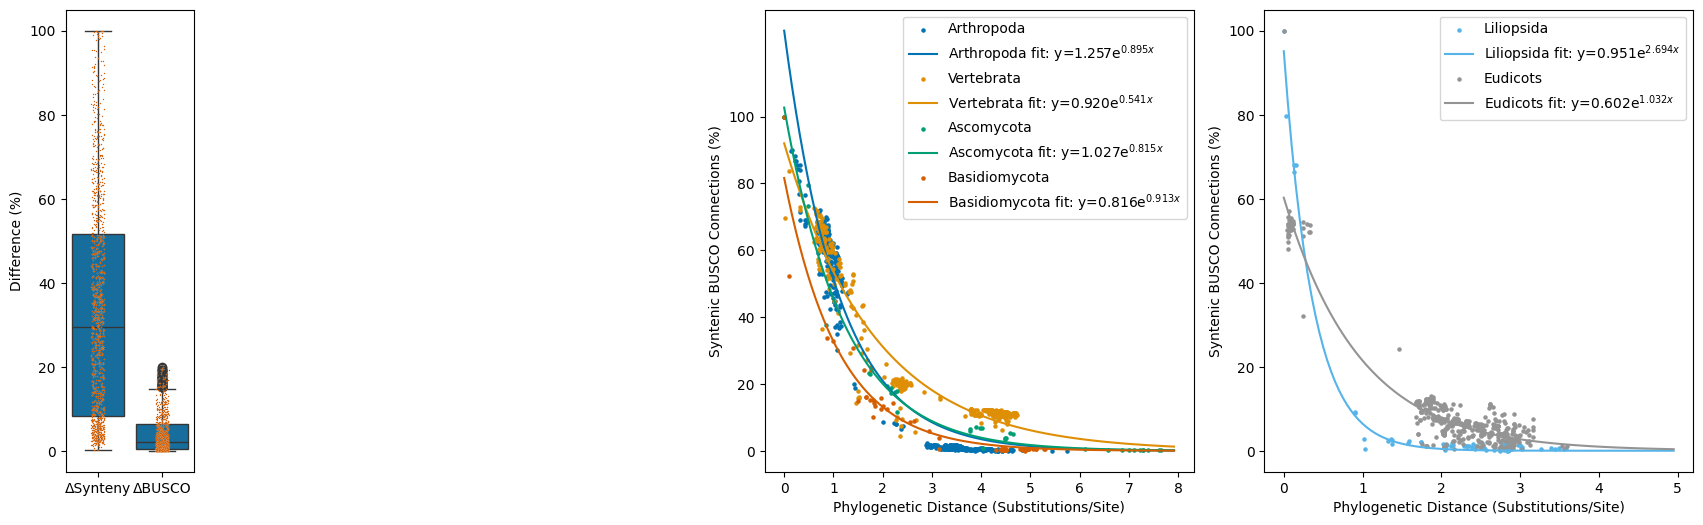

In [2342]:
fig, ax = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios': [0.3,1,1,1]})#, constrained_layout=True)
fig.set_figheight(6)
fig.set_figwidth(21)
#plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.boxplot(x=5, y=4, data=t7, color = sns.color_palette("colorblind")[0],ax=ax[0])
sns.stripplot(x=5, y=4, data=t7, s = 1, color=sns.color_palette("colorblind")[3], edgecolor="white", linewidth= 0.05, ax = ax[0])
#sns.swarmplot(x="Subject", y="Score", data=tn, s = 5, color=sns.color_palette("colorblind")[3], edgecolor="white", linewidth= 0.15, ax = ax[0])

ax[0].set_ylabel('Difference (%)')
ax[0].set_yticks(np.arange(0,1.2,.2), labels = np.arange(0,120,20), rotation = 0)
ax[0].set_xticks(ax[0].get_xticks(), labels = ['ΔSynteny','ΔBUSCO'], rotation = 0)
ax[0].set_xlabel('')

ax[1].set_axis_off()


def func(x, a, b, c):
    return a * np.exp(-b * x) #- c*x


rng = random.sample(sorted(r9[0].unique()), 1)
rng2 = r9[r9[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[2].scatter(xdata, ydata, label='Arthropoda', s = 5, color = sns.color_palette("colorblind")[0])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,8,8/100), 
           func(np.arange(0,8,8/100), *popt), 
           'g-', label='Arthropoda fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[0])

rng = random.sample(sorted(r10[0].unique()), 1)
rng2 = r10[r10[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[2].scatter(xdata, ydata, label='Vertebrata', s = 5, color = sns.color_palette("colorblind")[1])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,8,8/100), 
           func(np.arange(0,8,8/100), *popt), 
           'g-', label='Vertebrata fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[1])

rng = random.sample(sorted(r6[0].unique()), 1)
rng2 = r6[r6[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[2].scatter(xdata, ydata, label='Ascomycota', s = 5, color = sns.color_palette("colorblind")[2])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,8,8/100), 
           func(np.arange(0,8,8/100), *popt), 
           'g-', label='Ascomycota fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[2])

rng = random.sample(sorted(r7[0].unique()), 1)
rng2 = r7[r7[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[2].scatter(xdata, ydata, label='Basidiomycota', s = 5, color = sns.color_palette("colorblind")[3])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[2].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,8,8/100), 
           func(np.arange(0,8,8/100), *popt), 
           'g-', label='Basidiomycota fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[3])

#ax[2].set_ylim(0,1)
ax[2].set_ylabel('Syntenic BUSCO Connections (%)')
ax[2].set_xlabel('Phylogenetic Distance (Substitutions/Site)')
ax[2].set_yticks(np.arange(0,1.2,.2), labels = np.round(np.arange(0,120,20),2), rotation = 0)
ax[2].legend()

rng = random.sample(sorted(r2[0].unique()), 1)
rng2 = r2[r2[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[3].scatter(xdata, ydata, label='Liliopsida', s = 5, color = sns.color_palette("colorblind")[9])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[3].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,5,5/100), 
           func(np.arange(0,5,5/100), *popt), 
           'g-', label='Liliopsida fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[9])

rng = random.sample(sorted(r3[0].unique()), 1)
rng2 = r3[r3[0].isin(rng)].sort_values(1)
rng2[1] = rng2[1].div(10000)
xdata = rng2[2].values
ydata = rng2[1].values
ax[3].scatter(xdata, ydata, label='Eudicots', s = 5, color = sns.color_palette("colorblind")[7])
popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [10., 20., 1]), method = 'dogbox')
ax[3].plot(#np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), 
           #func(np.arange(min(xdata),max(xdata),(max(xdata)-min(xdata))/100), *popt), 
           np.arange(0,5,5/100), 
           func(np.arange(0,5,5/100), *popt), 
           'g-', label='Eudicots fit: y=%5.3fe$^{%5.3fx}$' % tuple(popt)[:2], color = sns.color_palette("colorblind")[7])

#ax[3].set_ylim(0,1)
ax[3].set_ylabel('Syntenic BUSCO Connections (%)')
ax[3].set_xlabel('Phylogenetic Distance (Substitutions/Site)')
ax[3].set_yticks(np.arange(0,1.2,.2), labels = np.round(np.arange(0,120,20),2), rotation = 0)
ax[3].legend()

plt.savefig('n5topr1.pdf', format = 'pdf')

In [1182]:
#assembly syntenic distance

In [1421]:
aa = pd.DataFrame()
l = 'liliopsida'
for i in os.listdir('/wing2/users/mdalam/asp/Osativa/ncbi_dataset/data/'):
    if os.path.isfile('/wing2/users/mdalam/asp/Osativa/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
        td = pd.read_csv('/wing2/users/mdalam/asp/Osativa/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        aa = pd.concat([aa,td], axis = 0)  

In [1422]:
ab = pd.DataFrame()
l = 'vertebrata'
for i in os.listdir('/wing2/users/mdalam/asp/Mmusculus/ncbi_dataset/data/'):
    if os.path.isfile('/wing2/users/mdalam/asp/Mmusculus/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
        td = pd.read_csv('/wing2/users/mdalam/asp/Mmusculus/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        ab = pd.concat([ab,td], axis = 0)

In [1423]:
ac = pd.DataFrame()
l = 'arthropoda'
for i in os.listdir('/wing2/users/mdalam/asp/Dmelanogaster/ncbi_dataset/data/'):
    if os.path.isfile('/wing2/users/mdalam/asp/Dmelanogaster/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
        td = pd.read_csv('/wing2/users/mdalam/asp/Dmelanogaster/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        ac = pd.concat([ac,td], axis = 0)

In [1424]:
ad = pd.DataFrame()
l = 'vertebrata'
for i in os.listdir('/wing2/users/mdalam/asp/Oaries/ncbi_dataset/data/'):
    if os.path.isfile('/wing2/users/mdalam/asp/Oaries/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
        td = pd.read_csv('/wing2/users/mdalam/asp/Oaries/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        ad = pd.concat([ad,td], axis = 0)

In [1425]:
ae = pd.DataFrame()
l = 'eudicots'
for i in os.listdir('/wing2/users/mdalam/asp/Athaliana/ncbi_dataset/data/'):
    if os.path.isfile('/wing2/users/mdalam/asp/Athaliana/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l)):
        td = pd.read_csv('/wing2/users/mdalam/asp/Athaliana/ncbi_dataset/data/{0}/{0}.mb/{1}_odb10/full_table.tsv'.format(i,l), sep = '\t', header = 0)
        td['Assembly'] = i
        td['l'] = l
        ae = pd.concat([ae,td], axis = 0)

In [1466]:
def dfds(ba):
    ba = ba[ba['Status'].isin(['Single','Duplicated'])]
    ba['fl'] = ba.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
    ba['fr'] = ba.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)
    ba = ba.sort_values(['Assembly', 'Sequence', 'fl'])
    ba['fl-1'] = ba['fl'].shift(-1)
    ba['fso'] = ba['fl-1'] - ba['fr']
    ba['s-1'] = ba['Sequence'].shift(-1)
    ba['g-1'] = ba['Gene'].shift(-1)
    ba = ba[~((ba['Sequence'] == ba['s-1']) & (ba['fso'] < 0 ) & (ba['Gene'] == ba['g-1']))].reset_index(drop=1)
    ba['s-1'] = ba['Sequence'].shift(-1)
    ba['g-1'] = ba['Gene'].shift(-1)
    ba['o-1'] = ba['Strand'].shift(-1)
    ba.loc[ba['g-1'].notnull(), 'gd'] = ba[ba['g-1'].notnull()].apply(lambda c: str(sorted([c['Gene'], c['g-1']])), axis = 1)
    ba.loc[ba['o-1'].notnull(), 'do'] = ba[ba['o-1'].notnull()].apply(lambda c: 's' if c['Strand'] == c['o-1'] else 'o', axis = 1)
    ba['agd'] = ba['Assembly']+'_'+ba['gd']
    ba.loc[ba['agd'].duplicated(keep=False), 'agd'] += ba.groupby('agd').cumcount().add(1).astype(str)
    ba = ba[ba['agd'].notnull()]
    ba['agdar'] = ba['agd'].apply(lambda x: x.split('_')[-1])
    ba = ba.groupby(['l','Assembly'])['agdar'].agg(set).reset_index()
    return ba

In [1467]:
ba = dfds(aa)
bb = dfds(ab)
bc = dfds(ac)
bd = dfds(ad)
be = dfds(ae)

/tmp/ipykernel_1085695/3823690882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba['fl'] = ba.apply(lambda c: min(c['Gene Start'], c['Gene End']), axis = 1)
/tmp/ipykernel_1085695/3823690882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba['fr'] = ba.apply(lambda c: max(c['Gene Start'], c['Gene End']), axis = 1)
/tmp/ipykernel_1085695/3823690882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [1468]:
def syndm(jn):
    t = []
    ij = 0
    for ia,ib,ic in jn.values:
        t2 = []
        ij2 = 0
        for ie,ig,ih in jn.values:
            if ij2 < ij:
                t2.append(0)
                ij2+=1
                continue
    
            t2.append((len(ic.intersection(ih)) * 10000)/ len(ic.union(ih)))
            
            ij2+=1
        t.append([ib] + t2)
        ij+=1
    return t

In [1487]:
def pdm(ba):
    ca = pd.DataFrame(syndm(ba))
    labs = ca[0].values
    ca = ca.iloc[:,1:]
    ca = pd.DataFrame(ca.values + ca.values.T - np.diag(np.diag(ca.values)))
    ca.index,ca.columns = labs,labs
    return ca

In [1489]:
ca = pdm(ba)
cb = pdm(bb)
cc = pdm(bc)
cd = pdm(bd)
ce = pdm(be)

In [2092]:
da = open("../r6/UniPhy/ca.nw").readline().rstrip()
db = open("../r6/UniPhy/cb.nw").readline().rstrip()
dc = open("../r6/UniPhy/cc.nw").readline().rstrip()
dd = open("../r6/UniPhy/cd.nw").readline().rstrip()
de = open("../r6/UniPhy/ce.nw").readline().rstrip()[:-1] #sometimes the semicolon causes problems

In [1512]:
ea = pd.read_csv('/wing2/users/mdalam/asp/Osativa/sp', sep = '\t', header = None)
eb = pd.read_csv('/wing2/users/mdalam/asp/Mmusculus/sp', sep = '\t', header = None)
ec = pd.read_csv('/wing2/users/mdalam/asp/Dmelanogaster/sp', sep = '\t', header = None)
ed = pd.read_csv('/wing2/users/mdalam/asp/Oaries/sp', sep = '\t', header = None)
ee = pd.read_csv('/wing2/users/mdalam/asp/Athaliana/sp', sep = '\t', header = None)

In [2027]:
fa = ea[(ea[1] > 0.8*387400000) & (ea[1] < 1.2*387400000)]
fb = eb[(eb[1] > 0.8*2700000000) & (eb[1] < 1.2*2700000000)]
fc = ec[(ec[1] > 0.8*145000000) & (ec[1] < 1.2*145000000)]
fd = ed[(ed[1] > 0.8*2700000000) & (ed[1] < 1.2*2700000000)]
fe = ee[(ee[1] > 0.8*135000000) & (ee[1] < 1.2*135000000)]

In [2028]:
fa[15] = fa[0].apply(lambda x: x.split('/')[0])
fb[15] = fb[0].apply(lambda x: x.split('/')[0])
fc[15] = fc[0].apply(lambda x: x.split('/')[0])
fd[15] = fd[0].apply(lambda x: x.split('/')[0])
fe[15] = fe[0].apply(lambda x: x.split('/')[0])

/tmp/ipykernel_1085695/1082789273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa[15] = fa[0].apply(lambda x: x.split('/')[0])
/tmp/ipykernel_1085695/1082789273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb[15] = fb[0].apply(lambda x: x.split('/')[0])
/tmp/ipykernel_1085695/1082789273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [2235]:
ga = bn.extract_subtree(da, np.append(fa.sort_values([13,8], ascending = [1,0]).iloc[0][15],fa.sort_values([13,8], ascending = [1,0])[-9:][15].values))
gb = bn.extract_subtree(db, np.append(fb.sort_values([13,8], ascending = [1,0]).iloc[0][15],fb.sort_values([13,8], ascending = [1,0])[-9:][15].values))
gc = bn.extract_subtree(dc, np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-9:][15].values))
gd = bn.extract_subtree(dd, np.append(fd.sort_values([13,8], ascending = [1,0]).iloc[0][15],fd.sort_values([13,8], ascending = [1,0])[-9:][15].values))
ge = bn.extract_subtree(de, np.append(fe.sort_values([13,8], ascending = [1,0]).iloc[0][15],fe.sort_values([13,8], ascending = [1,0])[-9:][15].values))

In [2112]:
def order_leaves(tree,lo):
    lod = pd.DataFrame(list(zip(range(len(lo)),lo)),columns = [3,1])
    root_node,b = bn.recur_nw_pd(tree,len(bn.leaves(tree)),[])
    root_node = int(root_node.replace('__',''))
    indexlist = pd.DataFrame(bn.nodes_w_all_descendants(tree)[1]).index[:-1][::-2]
    nodelist1 = pd.DataFrame(bn.nodes_w_all_descendants(tree)[1]).iloc[1:-1][1][::-2]
    nodelist2 = pd.DataFrame(bn.nodes_w_all_descendants(tree)[1]).iloc[:-2][1][::-2]
    nodepairs = zip(indexlist,nodelist1,nodelist2)
    ddict = bn.nodes_w_all_descendants(tree)[2]

    idxt = []
    for i,i2,i3 in zip(indexlist,nodelist1,nodelist2):
        ed1 = ddict[i2]
        ed2 = ddict[i3]
        lni1 = lowestnodeindex(lo,ed1)
        lni2 = lowestnodeindex(lo,ed2)
        if lni1 < lni2:
            idxt.append(i)
            idxt.append(i-1)
        else:
            idxt.append(i-1)
            idxt.append(i)
    bbu = pd.DataFrame(b)
    b = pd.DataFrame(bn.nodes_w_all_descendants(tree)[1]).loc[idxt[::-1]]
    b.loc[max(b.index)+1] = bbu.loc[max(b.index)+1]
    b = b.values
    #return b
    tb = bn.encode_leaves(tree,b)
    return bn.recur_pd_nw('%016.10f' % root_node, bn.trail(bn.reasign(pd.DataFrame(tb),tree)))    

def lowestnodeindex(lo,ed):
    lni = 1000000000
    for i in ed:
        if list(lo).index(i) < lni:
            lni = list(lo).index(i)
    return lni

In [1750]:
lo = np.append(fb.sort_values([13,8], ascending = [1,0]).iloc[0][15],fb.sort_values([13,8], ascending = [1,0])[-9:][15].values)

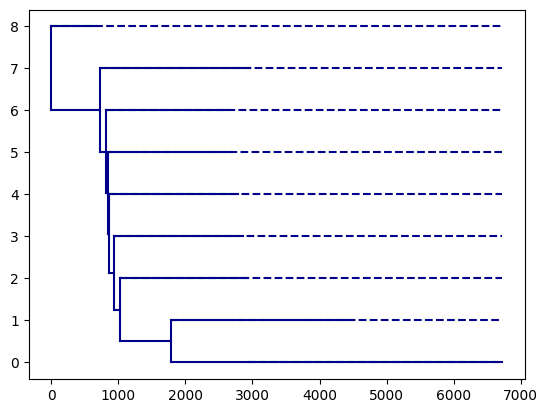

In [1751]:
bn.draw_clad(order_leaves(bn.flip_all_edges(bn.root_at(gb,'GCA_964188535.1')),lo))

In [1759]:
lo = np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-9:][15].values)

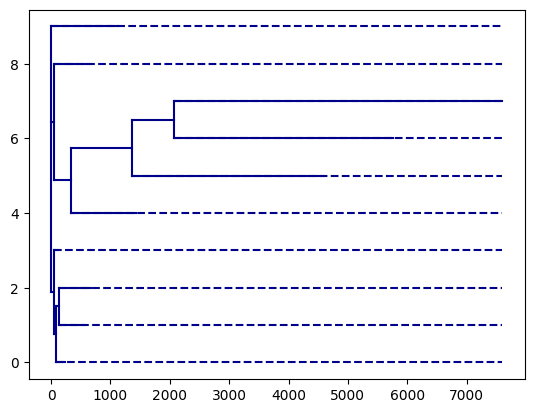

In [1760]:
bn.draw_clad(order_leaves(bn.flip_all_edges(bn.root_at(gc,'GCA_015852585.1')),lo))

In [1825]:
mct = '(GCA_015852585.1:1129.143035,((GCA_018904365.1:147.745666,(GCA_039694015.1:425.988065,GCA_039694025.1:549.621691):50.146223):23.801655,GCA_042606465.1:89.819001):55.168825,(GCA_000778455.1:611.035997,(GCA_002050065.1:1097.215111,(GCA_000705575.1:3231.565493,(GCA_001014345.1:3683.631354,GCA_009869825.1:5520.598859):710.265802):1038.475175):281.685578):47.187855)'

In [1932]:
ac[ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene'])]['Gene'].nunique()

913

In [2134]:
def aghp(fc,ac,dc):

    gc = bn.extract_subtree(dc, np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-9:][15].values))

    lo = np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-9:][15].values)
    mct = order_leaves(bn.flip_all_edges(bn.root_at(gc,fc.sort_values([13,8], ascending = [1,0]).iloc[0][15])),lo)

    hc = fc[fc[15].isin(np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-9:][15].values))].sort_values([13,8], ascending = [1,0])
    
    jc = hc[[1,2,8,9,10,11,12,13]]
    jc[1] = jc[1].div(1000000)
    jc[8] = jc[8].div(1000)
    jc[10] = jc[10].div(1000)
    jc[12] = jc[12].div(1000)
    jc.index = hc[15]

    custmp= ac[ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene'])]['Gene'].nunique()
    mustmp= ac[~ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene'])]['Gene'].nunique()
    
    jcc1 = ac[ac['Status'].isin(['Single','Duplicated'])].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)].div(ac['Gene'].nunique()/100)
    jcc2 = ac[ac['Status'].isin(['Single','Duplicated']) & (ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene']))].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)].div(custmp/100)
    jcc3 = ac[ac['Status'].isin(['Single','Duplicated']) & ~(ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene']))].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)].div(mustmp/100)

    fig, ax = plt.subplots(nrows=1, ncols=11, gridspec_kw={'width_ratios': [1.1,1.1,1.1,1.1,0.8,0.8,0.8,0.8,1,1,1]})#, constrained_layout=True)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    sns.heatmap(jc.loc[bn.leaves(mct)][[1]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])
    sns.heatmap(jc.loc[bn.leaves(mct)][[8]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[1])
    sns.heatmap(jc.loc[bn.leaves(mct)][[10]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[2])
    sns.heatmap(jc.loc[bn.leaves(mct)][[12]], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[3])
    
    sns.heatmap(jc.loc[bn.leaves(mct)][[2]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[4])
    sns.heatmap(jc.loc[bn.leaves(mct)][[9]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[5])
    sns.heatmap(jc.loc[bn.leaves(mct)][[11]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[6])
    sns.heatmap(jc.loc[bn.leaves(mct)][[13]], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[7])
    #sns.heatmap(jc.loc[bn.leaves(mct)][[1]], cmap='viridis',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])
    
    sns.heatmap(jcc1.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[8])
    sns.heatmap(jcc2.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[9])
    sns.heatmap(jcc3.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[10])
    
    for i in range(11):
        ax[i].get_yaxis().set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        #ax[0].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)
    ax[0].get_yaxis().set_visible(True)
    c=0
    for i in ['Size(Mb)','N50(Kb)','N70(Kb)','N90(Kb)','Contigs','L50','L70','L90','BUSCO','CUSCO','MUSCO']:
        ax[c].set_xticks(ax[c].get_xticks(),labels=[i])
        c+=1

    ax[0].set_ylabel('')

/tmp/ipykernel_1085695/2932602023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/2932602023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/2932602023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

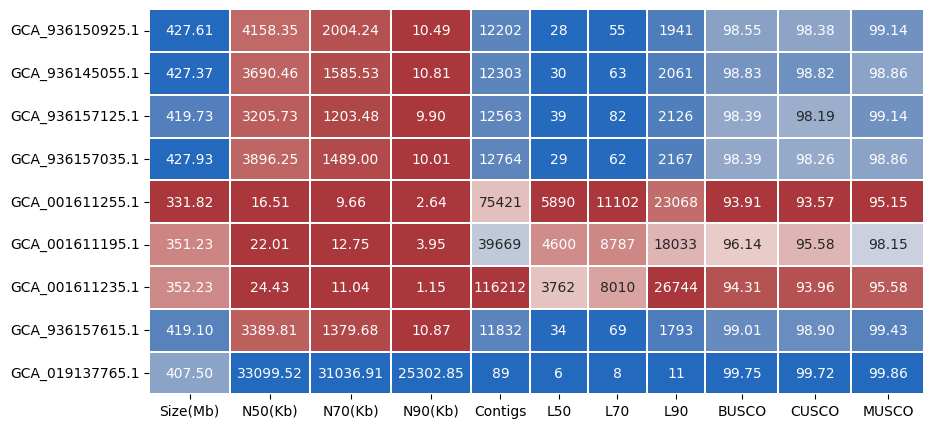

In [2135]:
aghp(fa,aa,da)

/tmp/ipykernel_1085695/3116440860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/3116440860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/3116440860.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

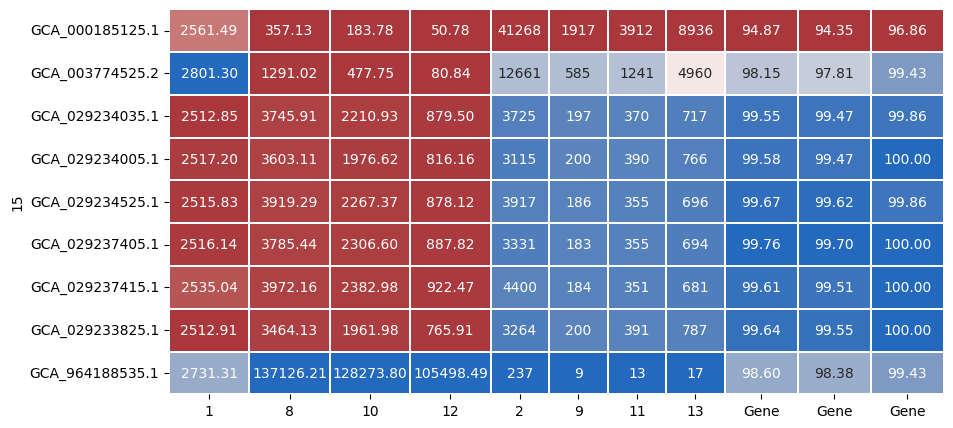

In [1939]:
aghp(fb,ab,db)

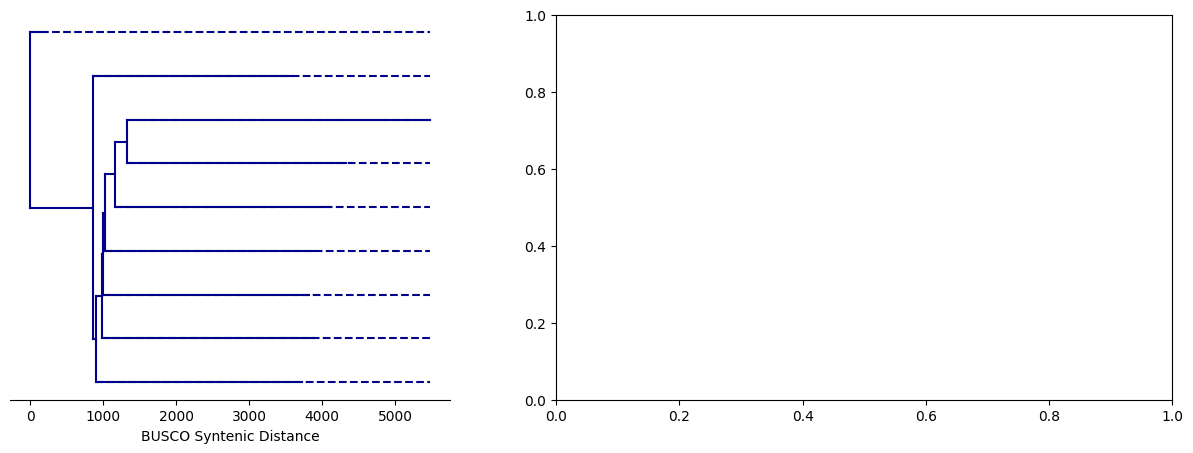

In [2161]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1.4]})#, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
#plt.subplots_adjust(wspace=0.87, hspace=0.3)

lo = np.append(fd.sort_values([13,8], ascending = [1,0]).iloc[0][15],fd.sort_values([13,8], ascending = [1,0])[-9:][15].values)
draw_clad(bn.recur_sin(order_leaves(bn.travel(bn.root_at(gd,fd.sort_values([13,8], ascending = [1,0]).iloc[0][15])),lo)))

ax[0].set_xlabel('BUSCO Syntenic Distance')

plt.savefig('n5eclad.pdf', format = 'pdf')

/tmp/ipykernel_1085695/2932602023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/2932602023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/2932602023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

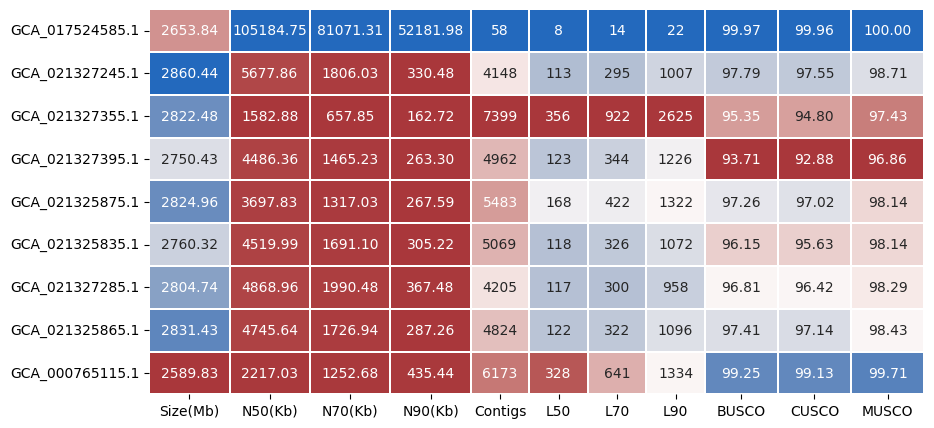

In [2150]:
aghp(fd,ad,dd)
plt.savefig('n5estrip.pdf', format = 'pdf', bbox_inches="tight")

/tmp/ipykernel_1085695/3116440860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/3116440860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/3116440860.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

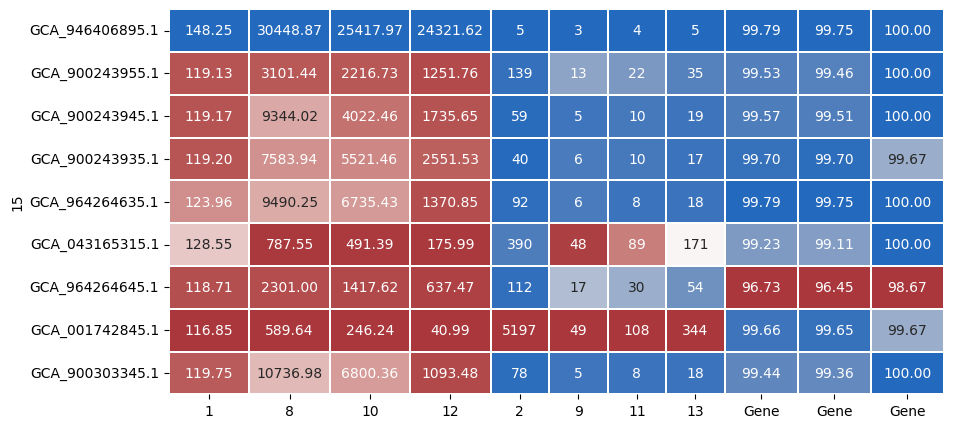

In [2043]:
aghp(fe,ae,de)

In [1832]:
jc.index = hc[15]

In [1843]:
def draw_clad(tree):
    root_node,b = bn.recur_nw_pd(tree,len(bn.leaves(tree)),[])    
    m = pd.DataFrame(bn.encode_leaves(tree,b))
    
    #vertical node locations
    t1 = dict([(i,i) for i in range(len(bn.leaves(tree)))])
    for a,b,c in m.values:
        if a not in t1.keys():
            t1[a] = bn.mean_d(m,a,t1)
    
    #horizontal node locations. end of edge. point at the right.      
    t2 = {int(root_node.replace('__','')):0}
    for a,b,c in m.values[::-1]:
        if b not in t2.keys():
            t2[b] = t2[a]+c
            
    #horizontal node locations. start of edge. point at the left.  
    t3 = {int(root_node.replace('__','')):0}
    for a,b,c in m.values[::-1]:
        t3[b] = t2[a]
    
    #vertical start and end.
    t4 = {}
    for a,b,c in m.values:
        if a not in t4.keys():
            t4[a] = bn.ab(m,a,t1)
            
    n = pd.concat([pd.DataFrame(t1.values(),index = t1.keys()), 
                   pd.DataFrame(t2.values(),index = t2.keys()), 
                   pd.DataFrame(t3.values(),index = t3.keys())], axis = 1)    

    
    #plt.subplots_adjust(left=3, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
    #nodes
    #ax[0,0].scatter(n.iloc[:,1],n.iloc[:,0])
    
    #horizontal lines
    for a,b,c in n.values:
        ax[0].plot([b,c],[a,a], color = 'darkblue')
    
    #vertical lines
    for k,v in t4.items():
        ax[0].plot([t2[k],t2[k]],v, color = 'darkblue')

    #dash to leaves
    for a,b,c in n.values[:len(bn.leaves(tree))]:
        ax[0].plot([c,max(t2.values())],[a,a], linestyle = '--', color = 'darkblue')
    
    ax[0].get_yaxis().set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    #ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['left'].set_visible(False)

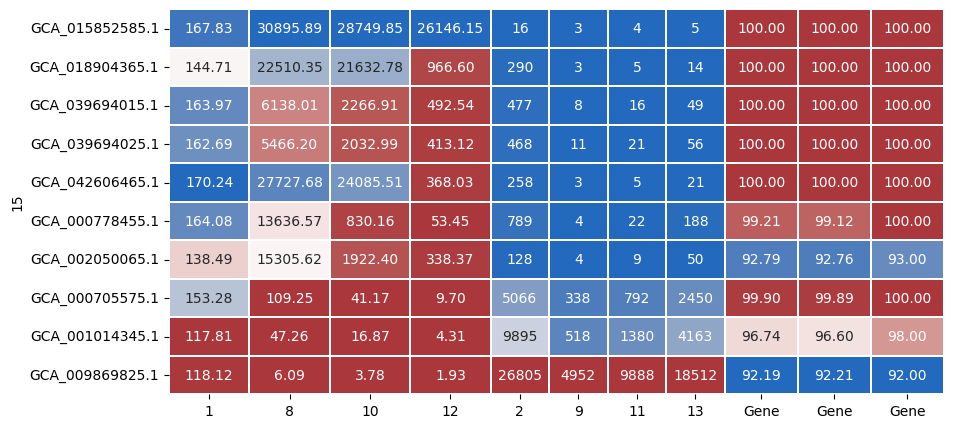

In [1923]:
fig, ax = plt.subplots(nrows=1, ncols=11, gridspec_kw={'width_ratios': [1.1,1.1,1.1,1.1,0.8,0.8,0.8,0.8,1,1,1]})#, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(10)
plt.subplots_adjust(wspace=0, hspace=0)

sns.heatmap(jc.loc[bn.leaves(mct)][[1]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])
sns.heatmap(jc.loc[bn.leaves(mct)][[8]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[1])
sns.heatmap(jc.loc[bn.leaves(mct)][[10]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[2])
sns.heatmap(jc.loc[bn.leaves(mct)][[12]], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[3])

sns.heatmap(jc.loc[bn.leaves(mct)][[2]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[4])
sns.heatmap(jc.loc[bn.leaves(mct)][[9]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[5])
sns.heatmap(jc.loc[bn.leaves(mct)][[11]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[6])
sns.heatmap(jc.loc[bn.leaves(mct)][[13]], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[7])
#sns.heatmap(jc.loc[bn.leaves(mct)][[1]], cmap='viridis',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])

sns.heatmap(jcc1.reset_index()[['Gene']], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[8])
sns.heatmap(jcc2.reset_index()[['Gene']], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[9])
sns.heatmap(jcc3.reset_index()[['Gene']], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[10])

for i in range(11):
    ax[i].get_yaxis().set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    #ax[0].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
ax[0].get_yaxis().set_visible(True)

In [ ]:
#supplementaries

In [2238]:
def aghp(fc,ac,dc,cutoff):

    gc = bn.extract_subtree(dc, np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-cutoff:][15].values))

    lo = np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-cutoff:][15].values)
    mct = bn.recur_sin(order_leaves(bn.recur_sin(bn.travel(bn.root_at(gc,fc.sort_values([13,8], ascending = [1,0]).iloc[0][15]))),lo))

    hc = fc[fc[15].isin(np.append(fc.sort_values([13,8], ascending = [1,0]).iloc[0][15],fc.sort_values([13,8], ascending = [1,0])[-cutoff:][15].values))].sort_values([13,8], ascending = [1,0])
    
    jc = hc[[1,2,8,9,10,11,12,13]]
    jc[1] = jc[1].div(1000000)
    jc[8] = jc[8].div(1000)
    jc[10] = jc[10].div(1000)
    jc[12] = jc[12].div(1000)
    jc.index = hc[15]

    custmp= ac[ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene'])]['Gene'].nunique()
    mustmp= ac[~ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene'])]['Gene'].nunique()
    
    jcc1 = ac[ac['Status'].isin(['Single','Duplicated'])].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)[::-1]].div(ac['Gene'].nunique()/100)
    jcc2 = ac[ac['Status'].isin(['Single','Duplicated']) & (ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene']))].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)[::-1]].div(custmp/100)
    jcc3 = ac[ac['Status'].isin(['Single','Duplicated']) & ~(ac['Gene'].isin(pd.read_csv('../r6/UniPhy/CUS.tsv', sep = '\t')['Gene']))].groupby('Assembly')['Gene'].nunique().loc[bn.leaves(mct)[::-1]].div(mustmp/100)

    fig, ax = plt.subplots(nrows=1, ncols=11, gridspec_kw={'width_ratios': [1.1,1.1,1.1,1.1,0.8,0.8,0.8,0.8,1,1,1]})#, constrained_layout=True)
    fig.set_figheight(11)
    fig.set_figwidth(11)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[1]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[8]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[1])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[10]], cmap='vlag_r', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[2])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[12]], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[3])
    
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[2]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[4])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[9]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[5])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[11]], cmap='vlag', cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[6])
    sns.heatmap(jc.loc[bn.leaves(mct)[::-1]][[13]], cmap='vlag',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.0f', ax = ax[7])
    #sns.heatmap(jc.loc[bn.leaves(mct)][[1]], cmap='viridis',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[0])
    
    sns.heatmap(jcc1.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[8])
    sns.heatmap(jcc2.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[9])
    sns.heatmap(jcc3.reset_index()[['Gene']], cmap='vlag_r',cbar =False, square=False, linewidth=0.3, annot=True, fmt='.2f', ax = ax[10])
    
    for i in range(11):
        ax[i].get_yaxis().set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        #ax[0].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)
    ax[0].get_yaxis().set_visible(True)

    c=0
    for i in ['Size(Mb)','N50(Kb)','N70(Kb)','N90(Kb)','Contigs','L50','L70','L90','BUSCO','CUSCO','MUSCO']:
        ax[c].set_xticks(ax[c].get_xticks(),labels=[i])
        c+=1

    ax[0].set_ylabel('')

/tmp/ipykernel_1085695/1926080324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/1926080324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/1926080324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

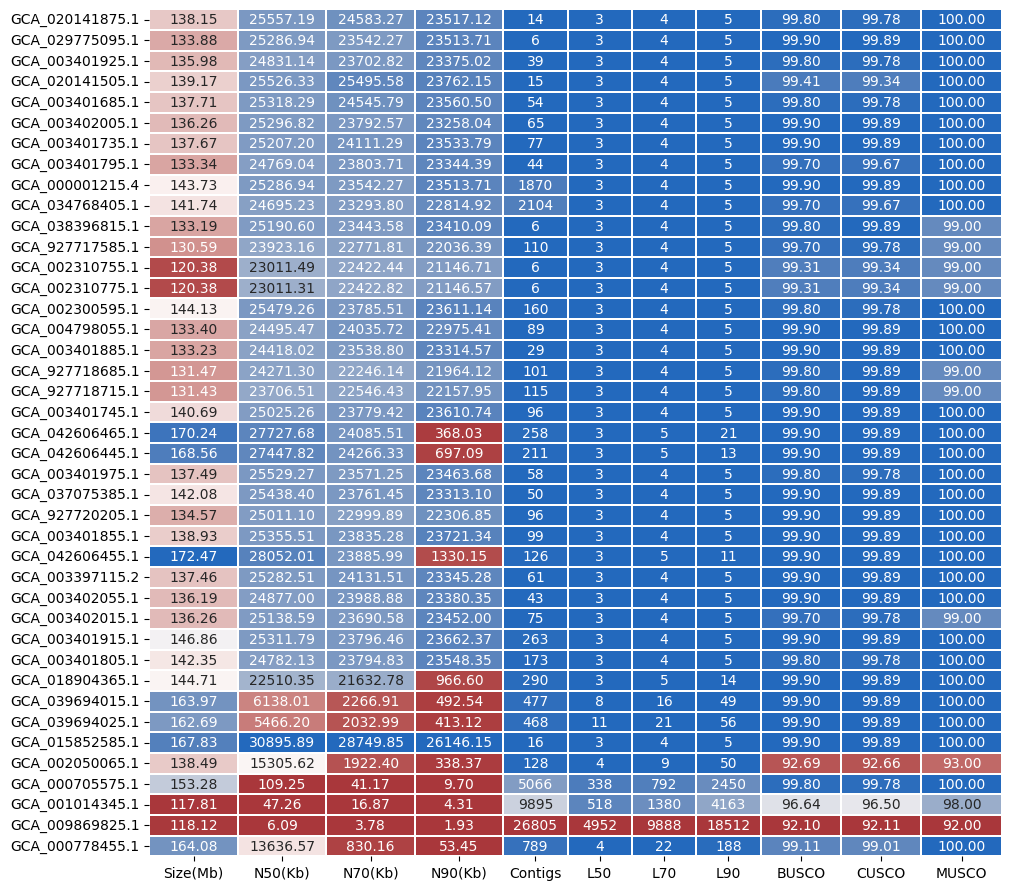

In [2239]:
aghp(fc,ac,dc,40)
plt.savefig('s9cstrip.pdf', format = 'pdf', bbox_inches="tight")

/tmp/ipykernel_1085695/1926080324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/1926080324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/1926080324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

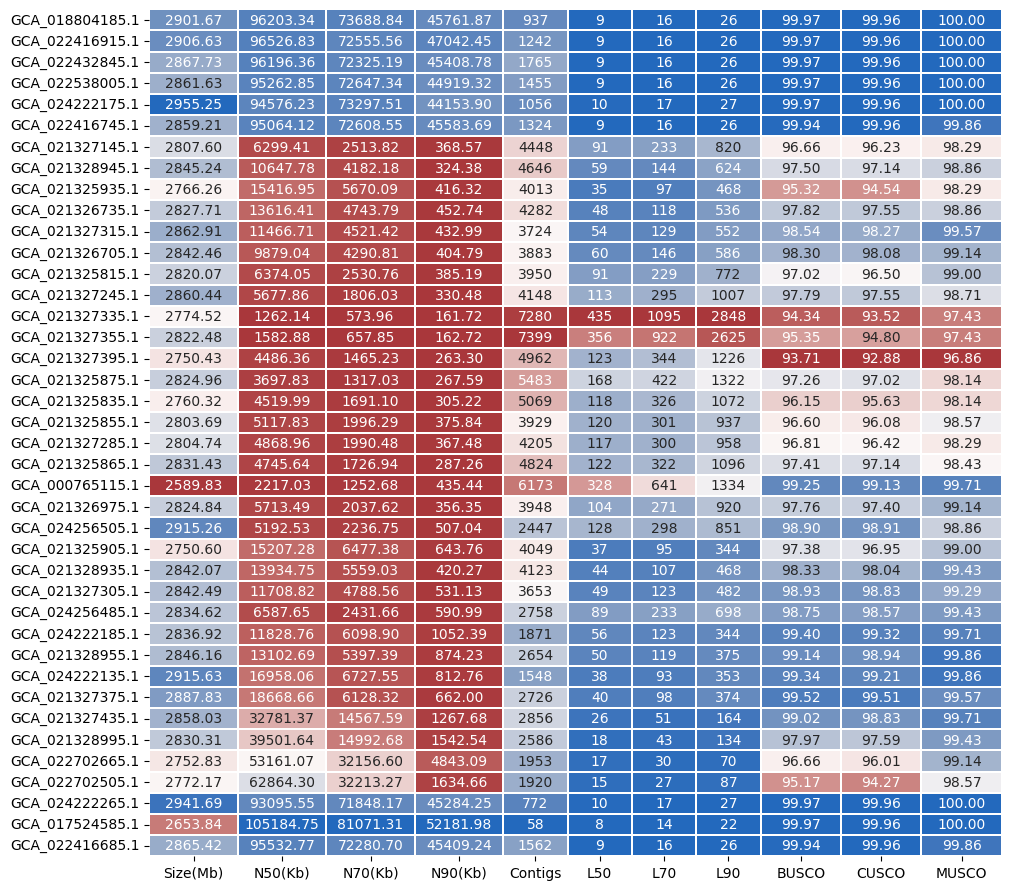

In [2240]:
aghp(fd,ad,dd,40)
plt.savefig('s9dstrip.pdf', format = 'pdf', bbox_inches="tight")

/tmp/ipykernel_1085695/1926080324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/1926080324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/1926080324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

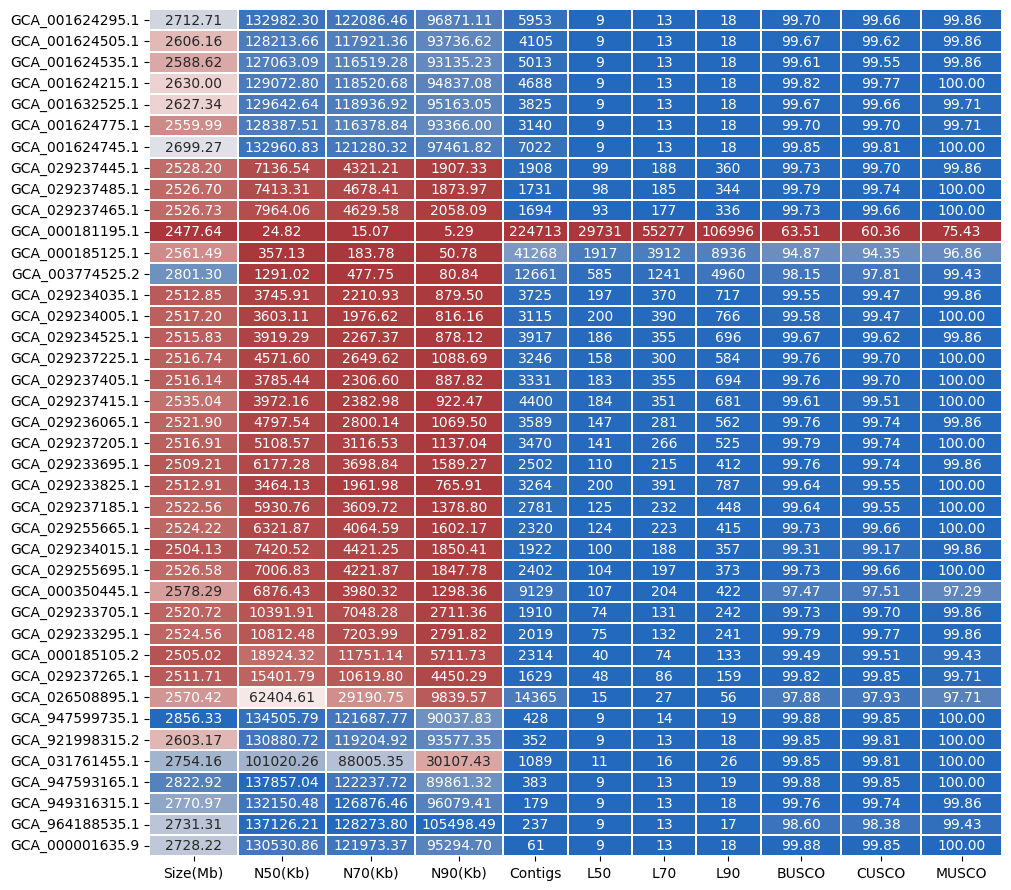

In [2241]:
aghp(fb,ab,db,40)
plt.savefig('s9bstrip.pdf', format = 'pdf', bbox_inches="tight")

/tmp/ipykernel_1085695/1926080324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/1926080324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/1926080324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

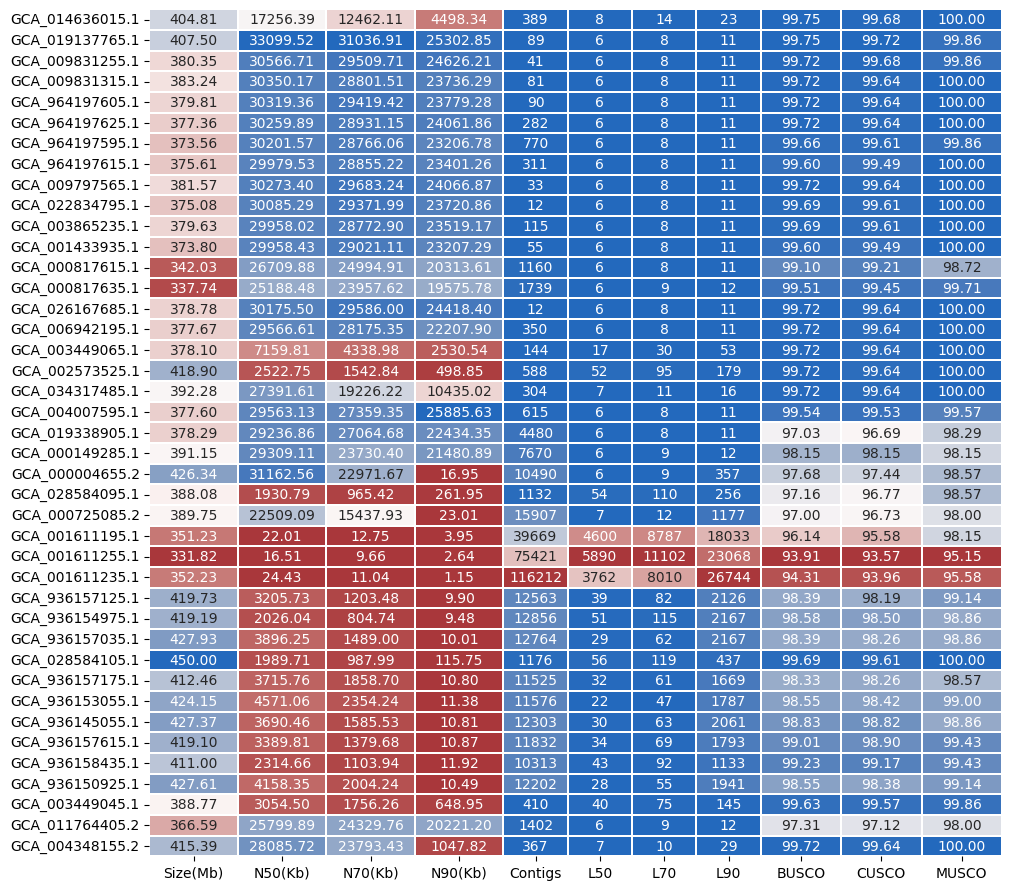

In [2242]:
aghp(fa,aa,da,40)
plt.savefig('s9astrip.pdf', format = 'pdf', bbox_inches="tight")

/tmp/ipykernel_1085695/1926080324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[1] = jc[1].div(1000000)
/tmp/ipykernel_1085695/1926080324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jc[8] = jc[8].div(1000)
/tmp/ipykernel_1085695/1926080324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

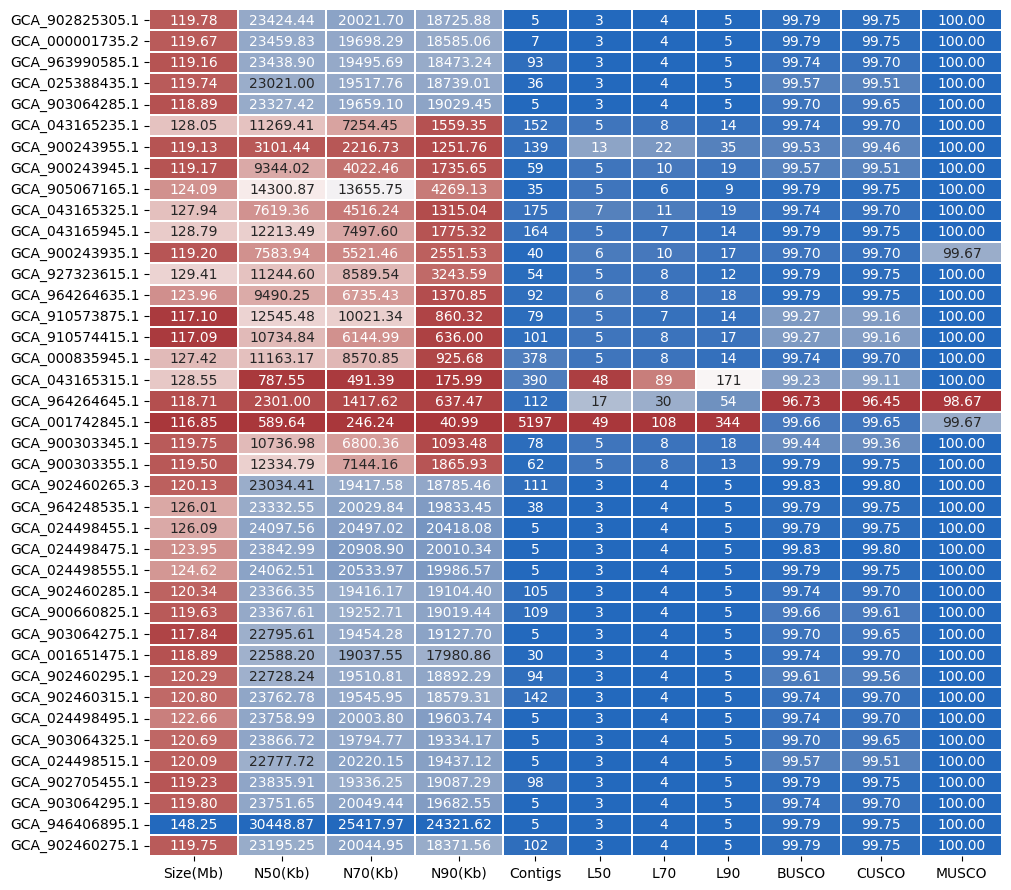

In [2243]:
aghp(fe,ae,de,40)
plt.savefig('s9estrip.pdf', format = 'pdf', bbox_inches="tight")

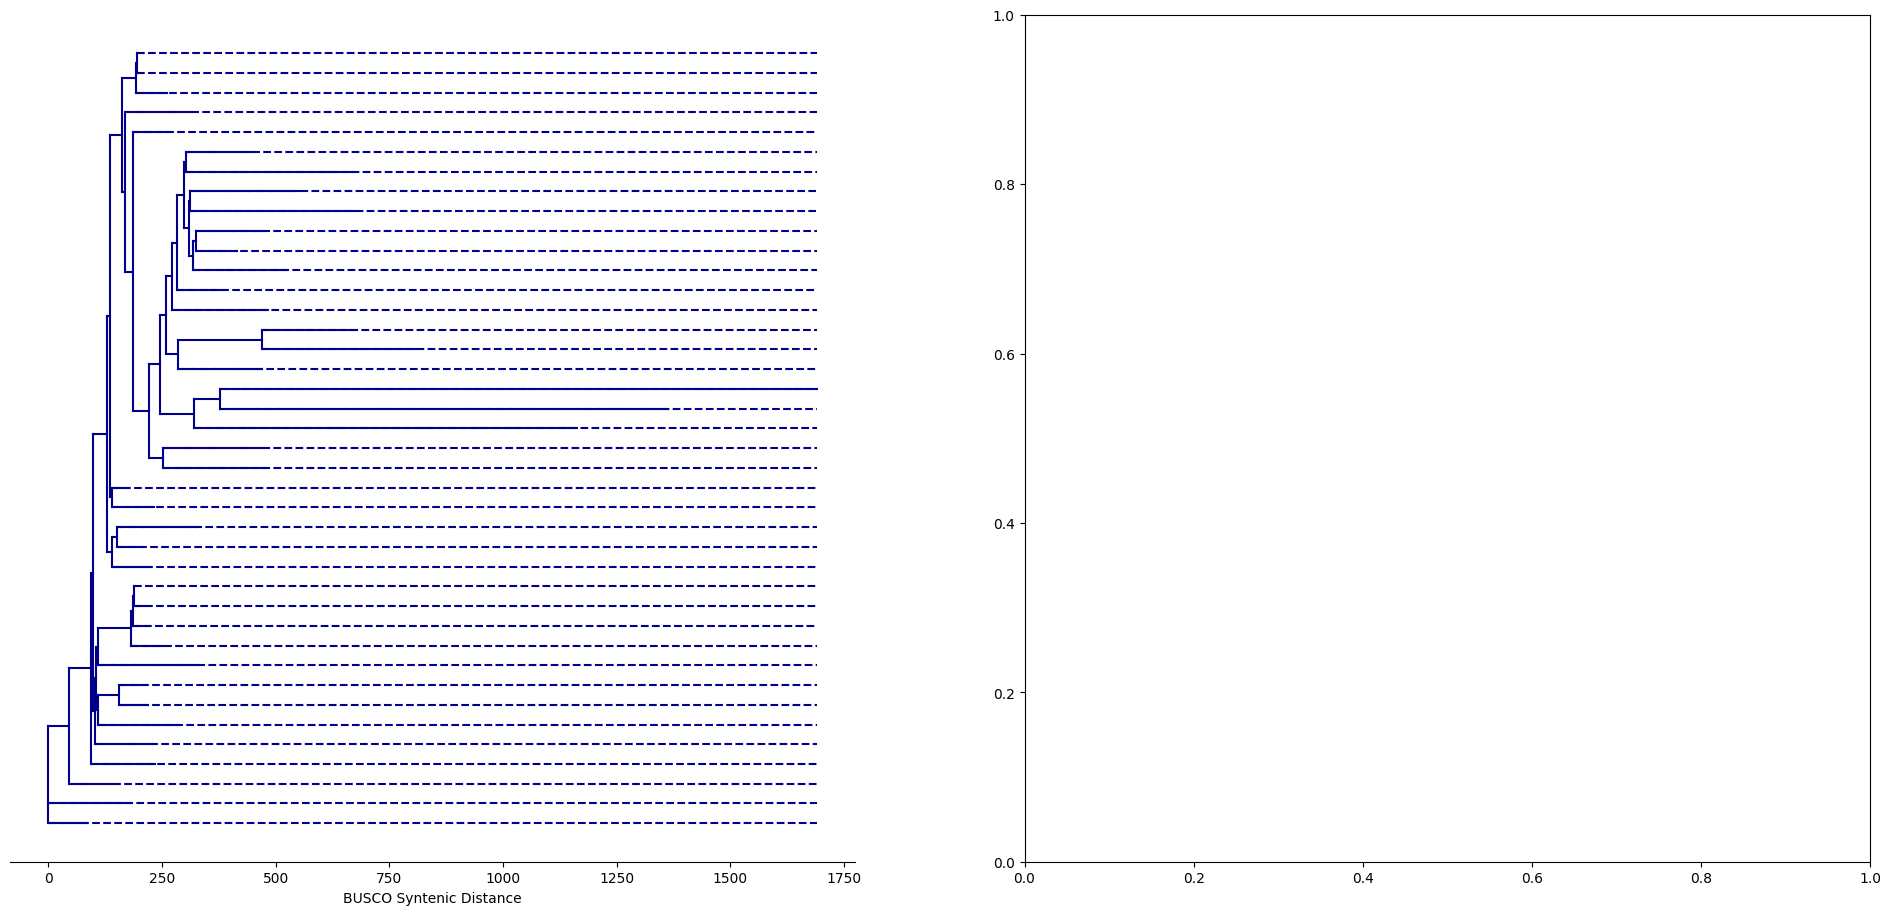

In [2248]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [1,1]})#, constrained_layout=True)
fig.set_figheight(11)
fig.set_figwidth(24)

gd = bn.extract_subtree(de, np.append(fe.sort_values([13,8], ascending = [1,0]).iloc[0][15],fe.sort_values([13,8], ascending = [1,0])[-40:][15].values))
lo = np.append(fe.sort_values([13,8], ascending = [1,0]).iloc[0][15],fe.sort_values([13,8], ascending = [1,0])[-40:][15].values)
draw_clad(bn.recur_sin(order_leaves(bn.recur_sin(bn.travel(bn.root_at(gd,fe.sort_values([13,8], ascending = [1,0]).iloc[0][15]))),lo)))

ax[0].set_xlabel('BUSCO Syntenic Distance')

plt.savefig('s9eclad.pdf', format = 'pdf', bbox_inches="tight")